In [1]:
#!import folium

## BOSQUEJO REAL

### Creacion de un HTML, para la visualizacion del mapa de Lima. 

In [14]:
import folium
from geopy.distance import geodesic

mapa = folium.Map(location=[-12.0464, -77.0428], zoom_start=12)

distritos = {
    "Miraflores": [-12.122, -77.030],
    "San Isidro": [-12.097, -77.036],
    "Barranco": [-12.143, -77.020],
    "Surco": [-12.129, -76.998],
    "San Borja": [-12.106, -76.999],
    "La Molina": [-12.085, -76.953]
}

for d, coord in distritos.items():
    folium.Marker(
        location=coord,
        popup=d,
        icon=folium.Icon(color='blue')
    ).add_to(mapa)

edges = []
nombre_distritos = list(distritos.keys())
for i in range(len(nombre_distritos)):
    for j in range(i + 1, len(nombre_distritos)):
        edges.append((nombre_distritos[i], nombre_distritos[j]))

for edge in edges:
    punto1 = distritos[edge[0]]
    punto2 = distritos[edge[1]]
    distancia = geodesic(punto1, punto2).kilometers
    folium.PolyLine(
        locations=[punto1, punto2], 
        color='gray', 
        weight=5,  
        tooltip=f"{distancia:.2f} km"
    ).add_to(mapa)
    mid_point = [(punto1[0] + punto2[0]) / 2, (punto1[1] + punto2[1]) / 2]
    folium.Marker(
        location=mid_point,
        icon=folium.DivIcon(html=f'<div style="font-size: 14pt; font-weight: bold; color: black;">{distancia:.2f} km</div>')
    ).add_to(mapa)

output_path = "mapa_lima_con_distancias.html"
mapa.save(output_path)
output_path

'mapa_lima_con_distancias.html'

# BOSQUEJO SIMPLE

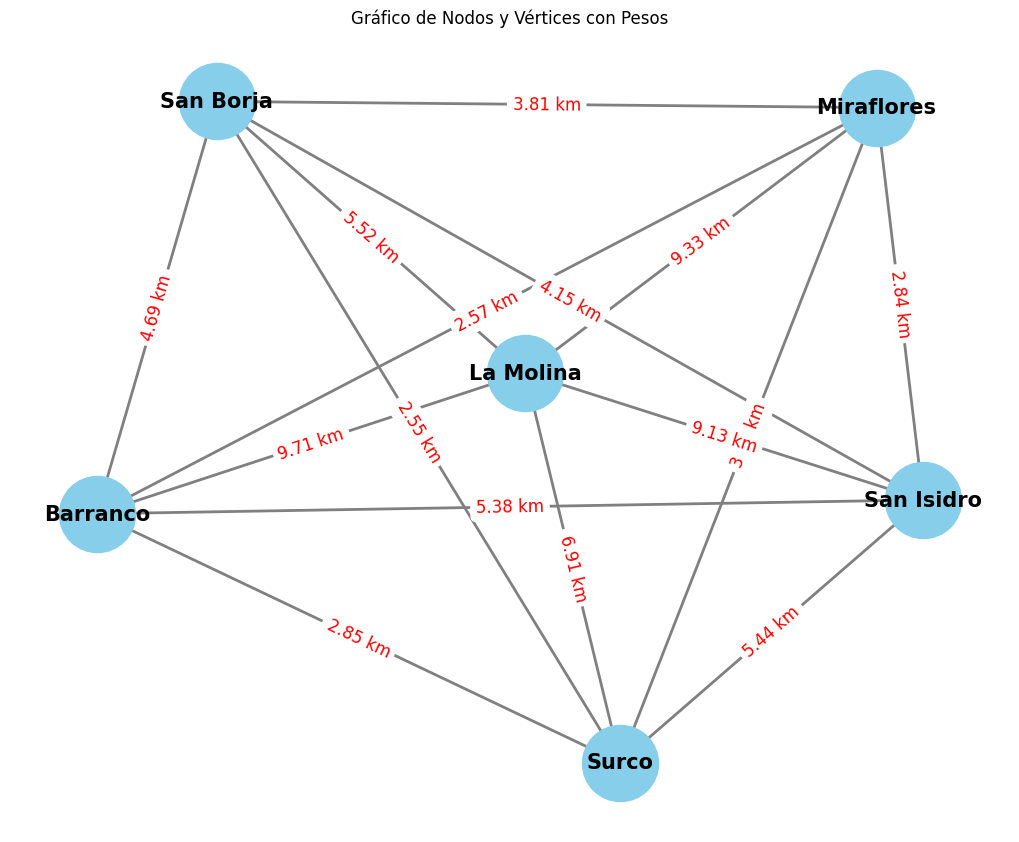

In [56]:
import matplotlib.pyplot as plt
import networkx as nx
from geopy.distance import geodesic

distritos = {
    "Miraflores": (-12.122, -77.030),
    "San Isidro": (-12.097, -77.036),
    "Barranco": (-12.143, -77.020),
    "Surco": (-12.129, -76.998),
    "San Borja": (-12.106, -76.999),
    "La Molina": (-12.085, -76.953)
}

G = nx.Graph()

for d in distritos:
    G.add_node(d)

edges = []
nombre_distritos = list(distritos.keys())
for i in range(len(nombre_distritos)):
    for j in range(i + 1, len(nombre_distritos)):
        punto1 = distritos[nombre_distritos[i]]
        punto2 = distritos[nombre_distritos[j]]
        distancia = geodesic(punto1, punto2).kilometers
        edges.append((nombre_distritos[i], nombre_distritos[j], distancia))

G.add_weighted_edges_from(edges)

pos = nx.spring_layout(G)  
plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=15, font_weight='bold', font_color='black', edge_color='gray', width=2)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f'{d:.2f} km' for u, v, d in edges}, font_size=12, font_color='red')
plt.title('Gráfico de Nodos y Vértices con Pesos')
plt.show()


In [ ]:
############################################

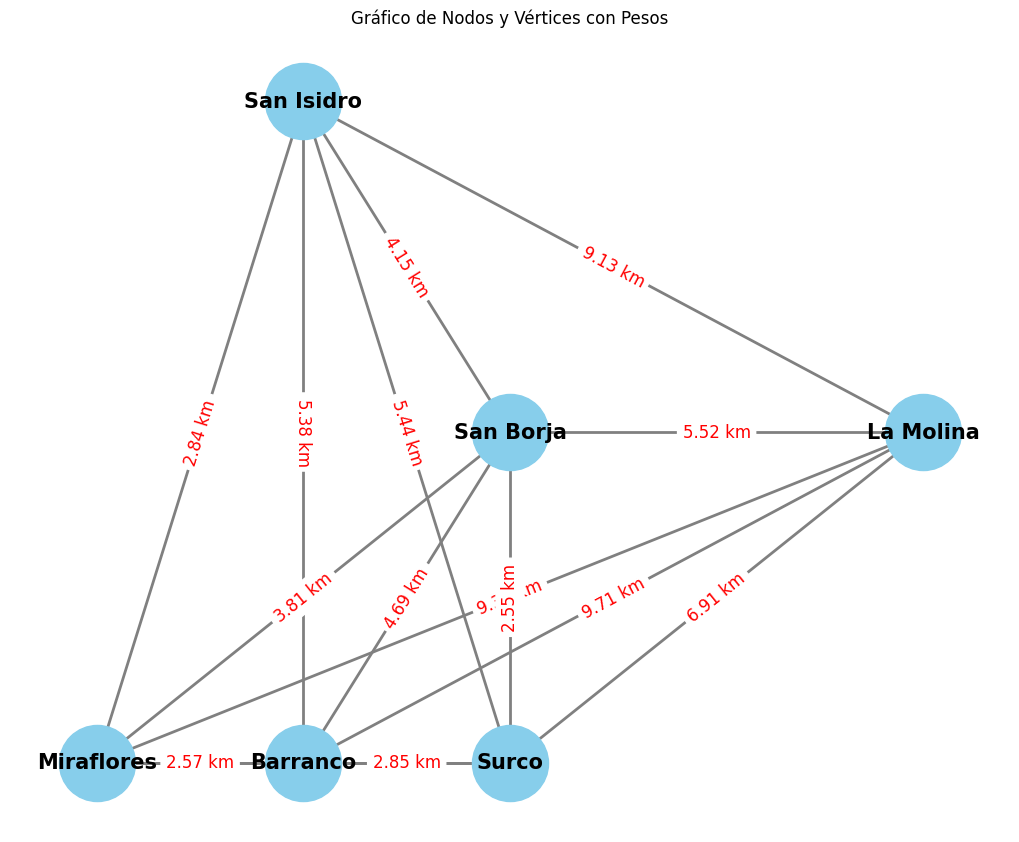

In [30]:
import matplotlib.pyplot as plt
import networkx as nx
from geopy.distance import geodesic

distritos = {
    "Miraflores": (-12.122, -77.030),
    "San Isidro": (-12.097, -77.036),
    "Barranco": (-12.143, -77.020),
    "Surco": (-12.129, -76.998),
    "San Borja": (-12.106, -76.999),
    "La Molina": (-12.085, -76.953)
}

G = nx.Graph()

for d in distritos:
    G.add_node(d)

edges = []
nombre_distritos = list(distritos.keys())
for i in range(len(nombre_distritos)):
    for j in range(i + 1, len(nombre_distritos)):
        punto1 = distritos[nombre_distritos[i]]
        punto2 = distritos[nombre_distritos[j]]
        distancia = geodesic(punto1, punto2).kilometers
        edges.append((nombre_distritos[i], nombre_distritos[j], distancia))
G.add_weighted_edges_from(edges)






pos = {
    "San Isidro": (0.5, 1),
    "San Borja": (1, 0.5),
    "La Molina": (2, 0.5),
    "Miraflores": (0, 0),
    "Barranco": (0.5, 0),
    "Surco": (1, 0)
}



plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=15, font_weight='bold', font_color='black', edge_color='gray', width=2)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f'{d:.2f} km' for u, v, d in edges}, font_size=12, font_color='red')
plt.title('Gráfico de Nodos y Vértices con Pesos')
plt.show()
